In [2]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 特征分析与选择

In [3]:
# 读取训练集和测试集为 DataFrame
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# 训练集数据
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


各字段的含义如下：

- PassengerId => 乘客ID
- Pclass => 乘客等级(1/2/3等舱位)
- Name => 乘客姓名
- Sex => 性别
- Age => 年龄
- SibSp => 堂兄弟/妹个数
- Parch => 父母与小孩个数
- Ticket => 船票信息
- Fare => 票价
- Cabin => 客舱
- Embarked => 登船港口

In [4]:
# 测试集数据
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# 训练数据集信息
train_data.info()
print '--------------------------------------'
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null o

In [6]:
# 数据清洗，去除 PassengerId、Name、Ticket 字段的值
train_data = train_data.drop(['PassengerId','Name','Ticket'], axis=1)
test_data = test_data.drop(['Name','Ticket'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
# 训练数据存在空数据
train_data.isnull().head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False


** 分析 Embarked 特征对 Survived 的影响 **

S


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False


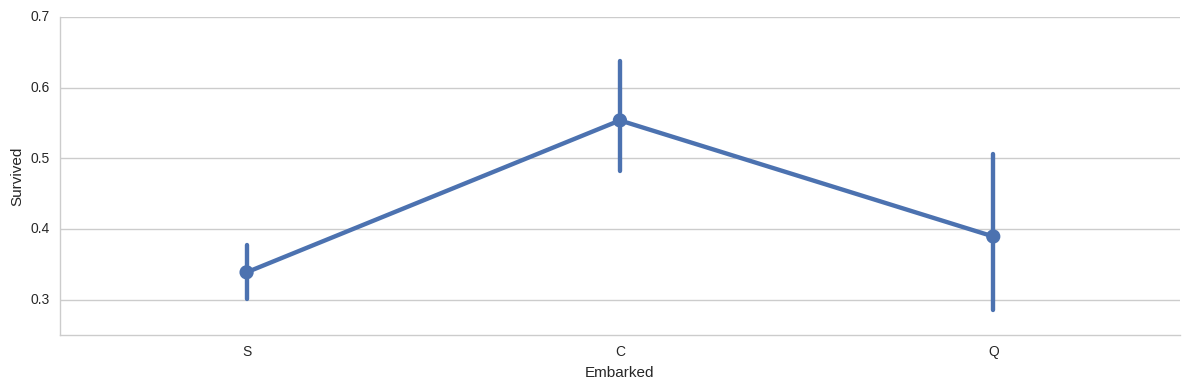

In [8]:
# 对于训练集，讲 Embarked 缺失的数据填充为最多的值 S
print train_data['Embarked'].max()
train_data['Embarked'] = train_data['Embarked'].fillna('S')
# size, aspect 指定绘制图像的大小
sns.factorplot('Embarked','Survived', data=train_data, size=4, aspect=3)
train_data.isnull().head()

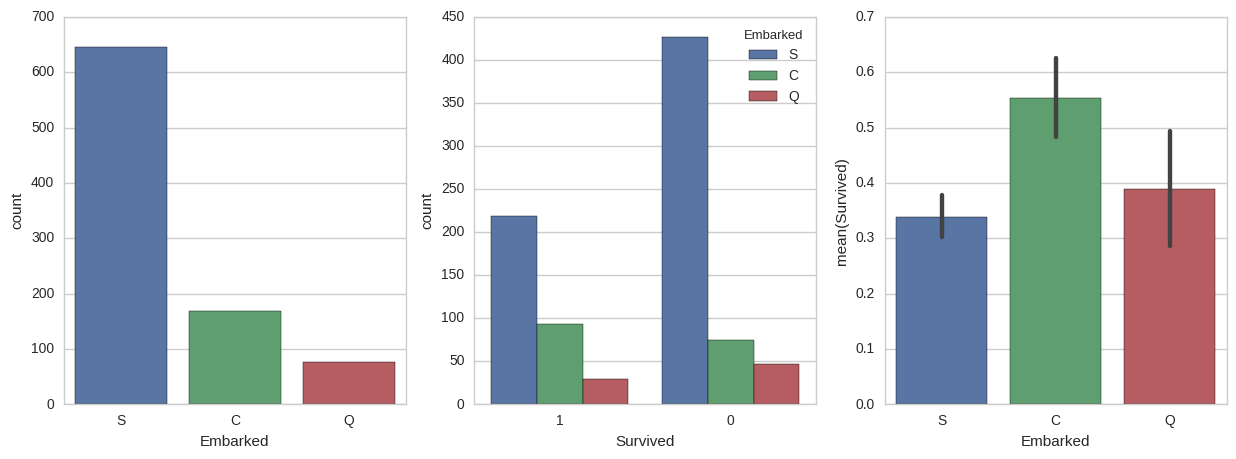

In [9]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=train_data, ax=axis1)
sns.countplot(x='Survived', hue='Embarked', data=train_data, ax=axis2, order=[1,0])
# 按照 Embarked 分组, 对每组计算 survived 的平均值
embark_perc = train_data[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=train_data, order=['S','C','Q'], ax=axis3)

由图可以看出，Embarked属性对 Survived 贡献并不明显。

** 分析 Fare 特征对 Survived 的影响 **

In [10]:
# 测试训练集和测试集的 Fare 特征是否存在缺失数据，测试集中存在一条缺失数据
train_data.ix[train_data['Fare'].isnull()].shape, \
test_data.ix[test_data['Fare'].isnull()].shape
test_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data.ix[152]

PassengerId       1044
Pclass               3
Sex               male
Age               60.5
SibSp                0
Parch                0
Fare           32.2042
Cabin              NaN
Embarked             S
Name: 152, dtype: object

48.3954076023 66.5969981183
22.1178868852 31.3882065306


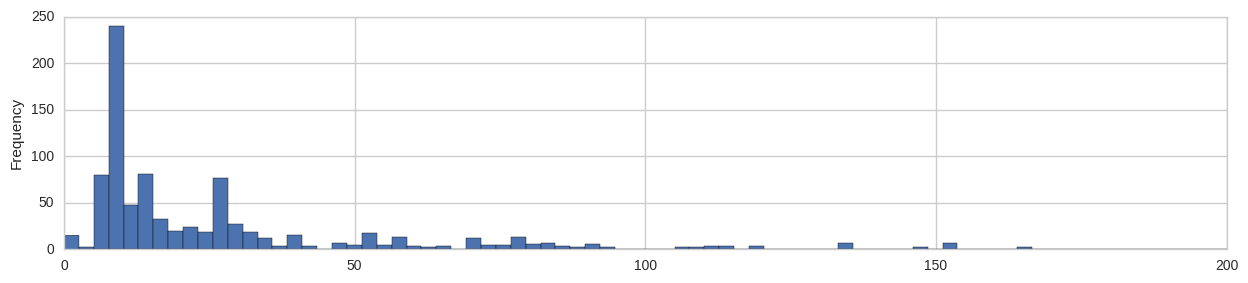

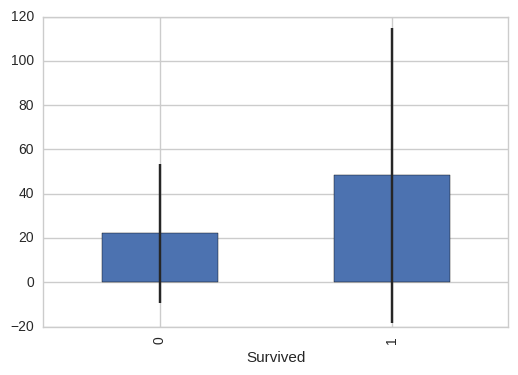

In [11]:
# 获取 survived / not survived 数据中的 Fare 属性的数据
survived_fare_train = train_data['Fare'][train_data['Survived'] == 1]
notsurvived_fare_train = train_data['Fare'][train_data['Survived'] == 0]

avgerage_fare = DataFrame([notsurvived_fare_train.mean(), survived_fare_train.mean()])
std_fare      = DataFrame([notsurvived_fare_train.std(), survived_fare_train.std()])

print survived_fare_train.mean(), survived_fare_train.std()
print notsurvived_fare_train.mean(), notsurvived_fare_train.std()

train_data['Fare'].plot(kind='hist', figsize=(15,3),bins=200, xlim=(0,200))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

由图可以基本看出，Fare 值越大(票价越高，社会等级越高)，存活的可能性相对越大，且分布在均值为48，方差为66，正负误差在-19 ～119左右。

** 分析 Age 特征对 Survived 的影响 **

In [12]:
# 测试训练集和测试集的 Age 特征是否存在确实数据
train_data.ix[train_data['Age'].isnull()].head()
test_data.ix[test_data['Age'].isnull()].head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
10,902,3,male,NaN,0,0,7.8958,NaN,S
22,914,1,female,NaN,0,0,31.6833,NaN,S
29,921,3,male,NaN,2,0,21.6792,NaN,C
33,925,3,female,NaN,1,2,23.4500,NaN,S
36,928,3,female,NaN,0,0,8.0500,NaN,S


说明训练集和测试集的 Age 特征骏存在确实数据，对于缺失数据，将其填充为高斯分布（mean，std满足训练集分布）的随机值。

/home/sunnymarkliu/software/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sunnymarkliu/software/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


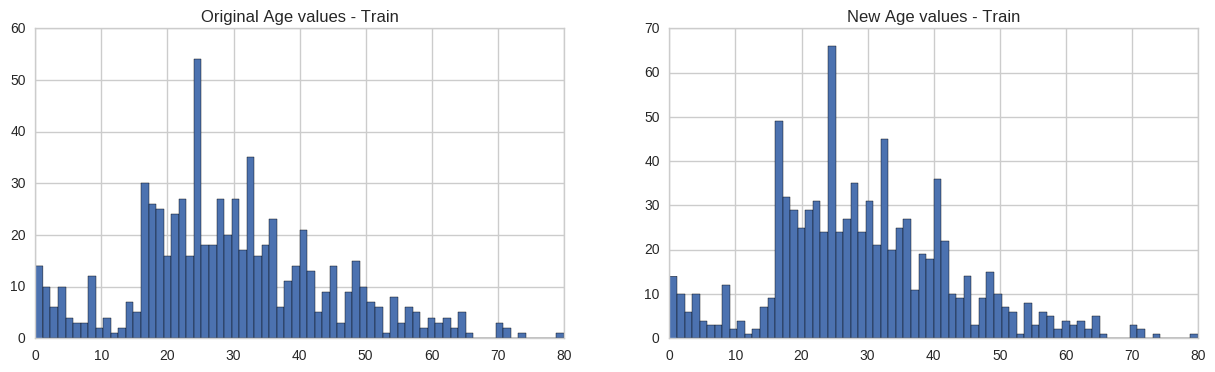

In [13]:
# 计算训练集和测试集年龄的 average, std, NaN 的数目
average_age_train = train_data['Age'].mean()
std_age_train = train_data['Age'].std()
nan_age_count_train = train_data['Age'].isnull().sum()

average_age_test = test_data['Age'].mean()
std_age_test = test_data['Age'].std()
nan_age_count_test = test_data['Age'].isnull().sum()

# 生成高斯分布（mean，std满足训练集分布）的随机值
rand_age_train = np.random.randint(average_age_train-std_age_train, average_age_train+std_age_train, 
                                   size=nan_age_count_train)
rand_age_test = np.random.randint(average_age_test-std_age_test, average_age_test+std_age_test, 
                                   size=nan_age_count_test)

# 绘制原始数据的 Age 特征
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Train')
train_data['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# 对缺失数据进行补全
train_data['Age'][np.isnan(train_data['Age'])] = rand_age_train
test_data['Age'][np.isnan(test_data['Age'])] = rand_age_test
# 绘制补全缺失数据的 Age 特征
axis2.set_title('New Age values - Train')
train_data['Age'].astype(int).hist(bins=70, ax=axis2)


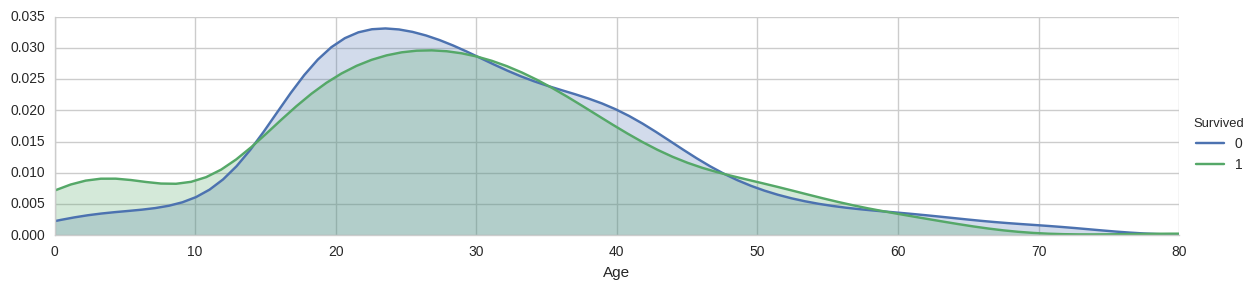

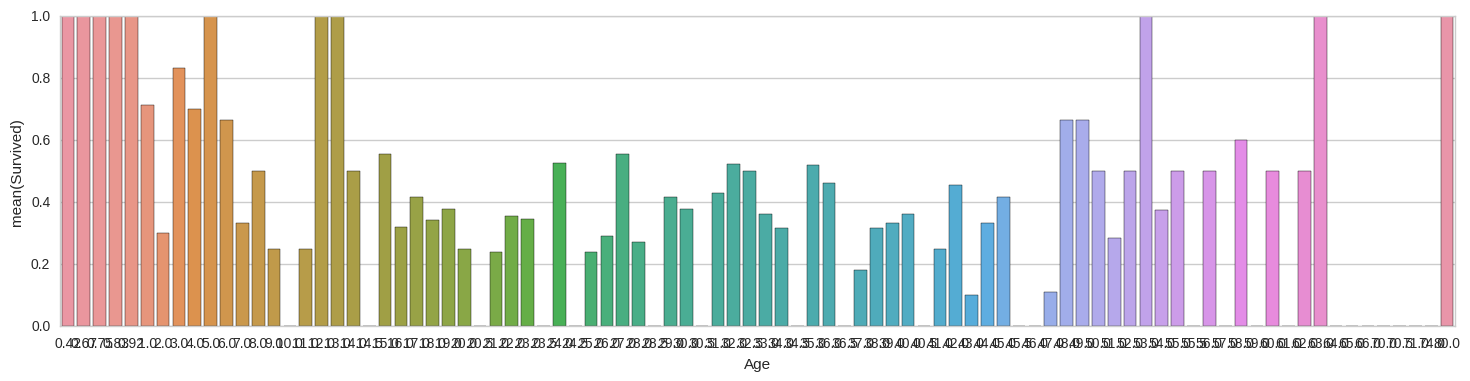

In [14]:
# peaks for survived/not survived passengers by their age， aspect设置绘图的大小
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
# 拟合和绘制一元或二元概率密度分布
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)


**  分析 Cabin 特征对 Survived 的影响 **

In [15]:
# 测试训练集和测试集的 Age 特征是否存在缺失数据
train_data.ix[train_data['Cabin'].isnull()].shape, \
test_data.ix[test_data['Cabin'].isnull()].shape

((687, 9), (327, 9))

测试发现 Cabin 字段存在过多的 NaN 缺失数据，所以考虑将 Cabin 字段删除。

In [16]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

** SibSp(堂兄弟/妹个数) 和 Parch（父母与小孩个数） 特征，可以将其组合成 Family 组合属性，Family成员个数是否对 Survive 有贡献。 **

In [17]:
# 测试训练集和测试集的 Parch 和 SibSp 特征是否存在缺失数据，测试发现不存在缺失数据。
train_data.ix[train_data['SibSp'].isnull()].shape, \
test_data.ix[test_data['SibSp'].isnull()].shape, \
train_data.ix[train_data['Parch'].isnull()].shape, \
test_data.ix[test_data['Parch'].isnull()].shape

((0, 8), (0, 8), (0, 8), (0, 8))

In [18]:
# Parch 和 SibSp 特征组合成 Family 特征
train_data['Family'] = train_data['Parch'] + train_data['SibSp']
test_data['Family'] = test_data['Parch'] + test_data['SibSp']

# drop Parch & SibSp
train_data.drop(['Parch', 'SibSp'], axis=1, inplace=True)
test_data.drop(['Parch', 'SibSp'], axis=1, inplace=True)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


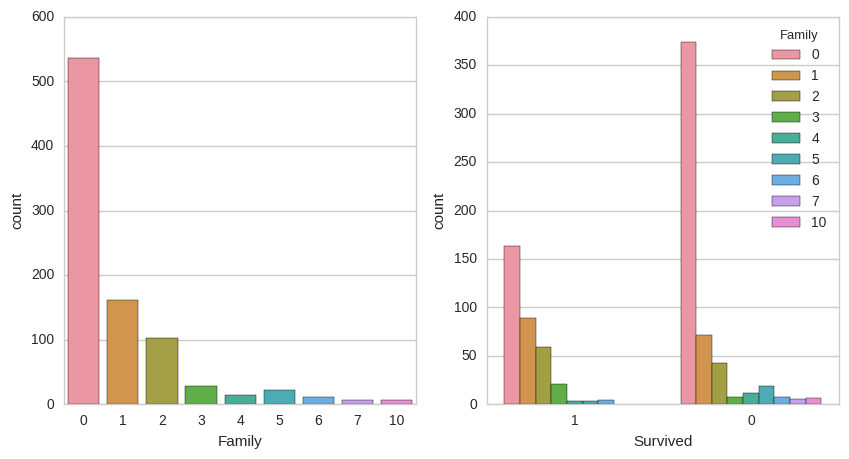

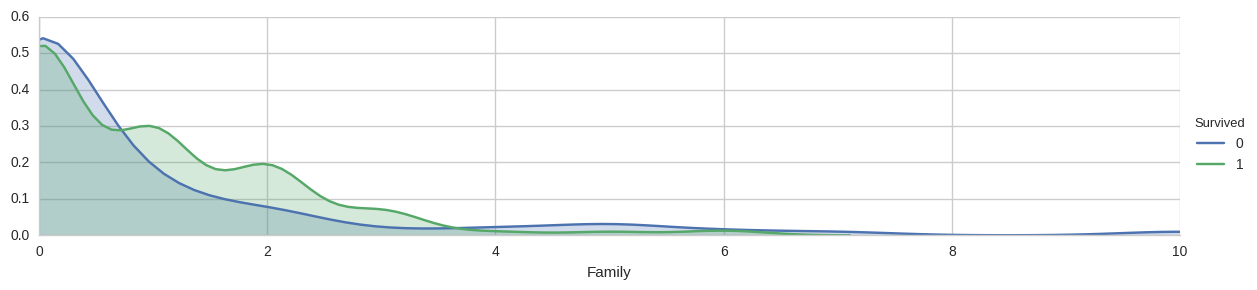

In [19]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(10,5))

sns.countplot(x='Family', data=train_data, ax=axis1)
sns.countplot(x='Survived', hue='Family', data=train_data, ax=axis2, order=[1,0])

# peaks for survived/not survived passengers by Family， aspect设置绘图的大小
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
# 拟合和绘制一元或二元概率密度分布
facet.map(sns.kdeplot,'Family',shade= True)
facet.set(xlim=(0, train_data['Family'].max()))
facet.add_legend()

由图可看出，训练集中 survived / not survived 类型中 Age 的分布近似相同，所以可以猜测 Age 特征对 survived 的贡献不大。

** 分析 Sex 特征对 Survived 的影响 **

In [20]:
# 测试训练集和测试集的 Sex 特征是否存在确实数据，测试不存在缺失数据
train_data.ix[train_data['Sex'].isnull()].head()
test_data.ix[test_data['Sex'].isnull()].head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family


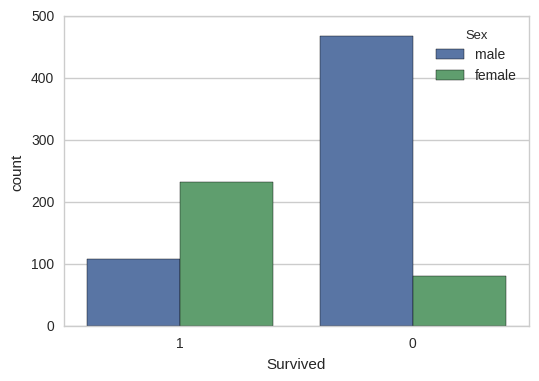

In [21]:
survived_Sex_train = train_data['Sex'][train_data['Survived'] == 1]
notsurvived_Sex_train = train_data['Sex'][train_data['Survived'] == 0]

sns.countplot(x='Survived', hue='Sex', data=train_data, order=[1,0])

可以看出，存活的人中 female 较多，未存活的 male 较多。按照常识可知， children 和 femail 有更高的存活几率。按照 Age 和 Sex 组合分类为 Person 类别。

In [22]:
def get_person(person_data):
    age, sex = person_data
    return 'child' if age < 16 else sex

train_data['Person'] = train_data[['Age', 'Sex']].apply(get_person, axis=1)
test_data['Person'] = test_data[['Age', 'Sex']].apply(get_person, axis=1)

# drop sex column
train_data.drop('Sex', axis=1, inplace=True)
test_data.drop('Sex', axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Age,Fare,Embarked,Family,Person
0,0,3,22.0,7.2500,S,1,male
1,1,1,38.0,71.2833,C,1,female
2,1,3,26.0,7.9250,S,0,female
3,1,1,35.0,53.1000,S,1,female
4,0,3,35.0,8.0500,S,0,male


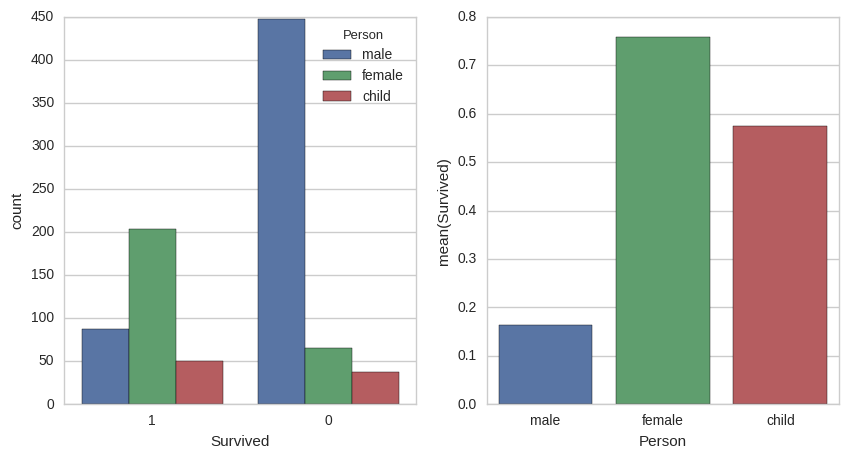

In [23]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x='Survived', hue='Person', data=train_data, order=[1, 0], ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_data[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])


可以看出，在存活的人中，male（非child） 所占比例最低，female、child 较高。

In [24]:
train_data.head()

,Survived,Pclass,Age,Fare,Embarked,Family,Person
0,0,3,22.0,7.2500,S,1,male
1,1,1,38.0,71.2833,C,1,female
2,1,3,26.0,7.9250,S,0,female
3,1,1,35.0,53.1000,S,1,female
4,0,3,35.0,8.0500,S,0,male


**  分析 Pclass(乘客等级1/2/3等舱位) 特征对 Survived 的影响 **

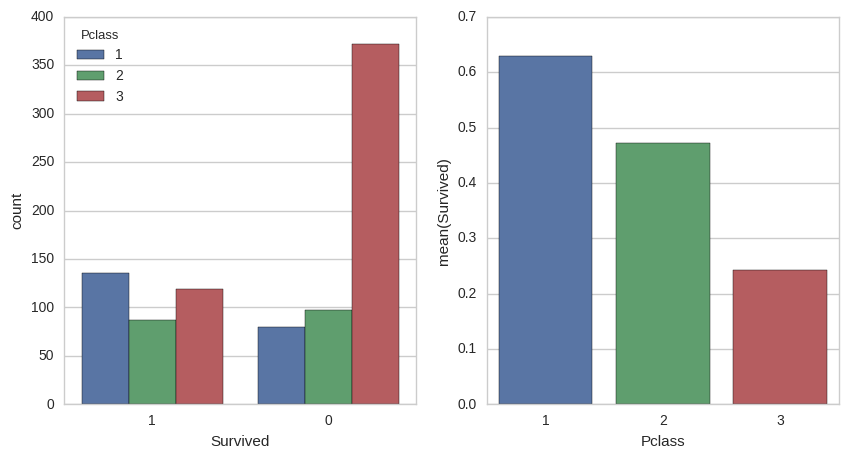

In [25]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x='Survived', hue='Pclass', data=train_data, order=[1, 0], ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_data[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).mean()
sns.barplot(x='Pclass', y='Survived', data=person_perc, ax=axis2, order=[1,2,3])

由图可以看出，乘客等级为3的舱位存活的几率较低，等级为1的舱位存活几率较高。

** 特征选择的结果为: **
- Pclass => 乘客等级(1/2/3等舱位)
- Age => 年龄
- Fare => 票价
- Embarked => 登船港口
- Family => 登船时的家庭成员情况
- Person => male、female、child

# 模型构建
## 数据的特征选择及向量化

In [26]:
# 对数据集进行向量化等处理
# 提取训练集特征和结果
X_train = train_data.drop('Survived',axis=1)
Y_train = train_data['Survived']

X_test  = test_data.drop('PassengerId',axis=1)

# 将特征进行向量化处理
from sklearn.feature_extraction import DictVectorizer
dict_vec = DictVectorizer(sparse=False)
X_train = dict_vec.fit_transform(X_train.to_dict(orient='record'))

In [27]:
# 对于
dict_vec.feature_names_

['Age',
 'Embarked=C',
 'Embarked=Q',
 'Embarked=S',
 'Family',
 'Fare',
 'Pclass',
 'Person=child',
 'Person=female',
 'Person=male']

In [28]:
print type(X_train), X_train.shape
X_train

<type 'numpy.ndarray'> (891, 10)


array([[ 22.,   0.,   0., ...,   0.,   0.,   1.],
       [ 38.,   1.,   0., ...,   0.,   1.,   0.],
       [ 26.,   0.,   0., ...,   0.,   1.,   0.],
       ..., 
       [ 23.,   0.,   0., ...,   0.,   1.,   0.],
       [ 26.,   1.,   0., ...,   0.,   0.,   1.],
       [ 32.,   0.,   1., ...,   0.,   0.,   1.]])

In [29]:
X_test = dict_vec.fit_transform(X_test.to_dict(orient='record'))
print type(X_test), X_test.shape
X_test

<type 'numpy.ndarray'> (418, 10)


array([[ 34.5,   0. ,   1. , ...,   0. ,   0. ,   1. ],
       [ 47. ,   0. ,   0. , ...,   0. ,   1. ,   0. ],
       [ 62. ,   0. ,   1. , ...,   0. ,   0. ,   1. ],
       ..., 
       [ 38.5,   0. ,   0. , ...,   0. ,   0. ,   1. ],
       [ 34. ,   0. ,   0. , ...,   0. ,   0. ,   1. ],
       [ 36. ,   1. ,   0. , ...,   0. ,   0. ,   1. ]])

## sklearn Random Forests 和 xgboost

对于 Logistic Regression 回归，分析各特征对 survived 为 1 的贡献程度。

In [1]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print logreg.score(X_train, Y_train)

# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

NameError: name 'LogisticRegression' is not defined

In [41]:
# n_estimators： The number of trees in the forest.
random_forest = RandomForestClassifier(n_estimators=200)
from xgboost import XGBClassifier
xgbc = XGBClassifier()

# 使用5折交叉验证的方法在训练集上分别对 random_forest 和 XGBClassifier的分类性能进行评估，获取平均分类准确度的得分
from sklearn.cross_validation import cross_val_score
print 'random_forest', cross_val_score(random_forest, X_train, Y_train, cv=5).mean()
print 'xgbc', cross_val_score(xgbc, X_train, Y_train, cv=5).mean()

random_forest 0.803632011921
xgbc 0.830573621341


In [42]:
# 随机森林分类
random_forest.fit(X_train, Y_train)
# 预测分类的类别
Y_predict_random_forest = random_forest.predict(X_test)
# 预测分类的类别的概率
Y_predict_proba = random_forest.predict_proba(X_test)

In [43]:
submission_result = pd.DataFrame({
        'PassengerId': test_data['PassengerId'],
        'Survived': Y_predict_random_forest
    })
submission_result.to_csv('result/basic_random_forest.csv', index=False)

In [44]:
# XGBClassifier 分类
xgbc.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [45]:
Y_predict_random_xgbc = xgbc.predict(X_test)

submission_result = pd.DataFrame({
        'PassengerId': test_data['PassengerId'],
        'Survived': Y_predict_random_xgbc
    })
submission_result.to_csv('result/basic_xgbc.csv', index=False)